# Increase in Reactor Regenerator Pressure Difference

## **Data Cleaning, Feature Engineering, Predictive Modeling**

Importing libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_excel('columns.xlsx')
col = df['Symbol'].values
col = col.tolist()

In [3]:
df_stableFeedFlow = pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/NOC_stableFeedFlow_outputs.csv',header=None)
df_stableFeedFlow.set_index = df_stableFeedFlow.iloc[:,0]
df_stableFeedFlow = df_stableFeedFlow.drop(columns=0)
df_stableFeedFlow.columns= col
df_stableFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
359   165.14  78.761  460.22  34.4    -6.4  28  2.6845  1569.2  616.00   
2043  164.80  79.857  461.54  34.4    -6.4  28  2.6752  1558.9  616.01   
983   164.90  79.330  460.77  34.4    -6.4  28  2.6794  1564.2  616.00   
635   164.70  79.964  461.35  34.4    -6.4  28  2.6793  1559.5  616.02   
501   164.89  79.558  461.11  34.4    -6.4  28  2.6793  1562.1  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
359   969.03  ...  1643.0   211.20   2996.7  313.99  509.92  628.22  46.933   
2043  968.96  ...  1633.6   222.36   2972.2  314.42  509.55  627.95  46.391   
983   969.01  ...  1643.9   213.70   2976.6  314.05  509.67  627.89  46.806   
635   969.06  ...  1645.2   214.42   2992.5  314.71  509.74  628.01  46.000   
501   969.01  ...  1648.4   215.16   3003.4  314.65  509.85  628.23  46.145   

          V8     V10     V11  
359   49.820  49.118  47.176  
2043  49.335  49.622  46.670  
983   49.470  49.341  47.248  
635   49.624  49.571  47.318  
501   49.815  50.060  47.492  

[5 rows x 46 columns]

In [4]:
df_varyingFeedFlow=pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/NOC_varyingFeedFlow_outputs.csv',header=None)
df_varyingFeedFlow.set_index = df_varyingFeedFlow.iloc[:,0]
df_varyingFeedFlow = df_varyingFeedFlow.drop(columns=0)
df_varyingFeedFlow.columns= col
df_varyingFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
7210  165.79  75.108  460.23  34.4    -6.4  28  2.6949  1573.1  616.01   
2898  164.32  75.243  460.55  34.4    -6.4  28  2.6689  1562.0  616.00   
3196  164.78  78.488  461.88  34.4    -6.4  28  2.6771  1556.8  616.00   
8302  167.80  78.611  460.60  34.4    -6.4  28  2.7239  1583.3  615.99   
6452  163.87  79.963  460.67  34.4    -6.4  28  2.6623  1558.5  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
7210  969.03  ...  1656.7   214.68   3098.0  313.53  511.06  629.95  48.208   
2898  968.98  ...  1633.4   220.82   2863.9  309.39  509.04  627.15  52.405   
3196  969.02  ...  1630.4   209.39   2895.6  311.95  509.13  626.93  48.977   
8302  968.97  ...  1681.3   206.05   3392.6  320.63  513.01  632.35  40.842   
6452  968.99  ...  1629.1   223.54   2867.2  312.55  508.61  626.61  48.155   

          V8     V10     V11  
7210  51.588  49.956  47.851  
2898  48.382  49.231  46.711  
3196  48.477  47.604  46.538  
8302  55.204  51.673  49.086  
6452  47.892  49.504  46.503  

[5 rows x 46 columns]

In [5]:
df_deltaP_increase = pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/deltaP_increase_outputs.csv',header=None)
df_deltaP_increase.set_index = df_deltaP_increase.iloc[:,0]
df_deltaP_increase = df_deltaP_increase.drop(columns=0)
df_deltaP_increase.columns= col
df_deltaP_increase.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
784   165.19  79.972  461.03  34.8    -6.8  28  2.6821  1564.4  616.00   
1074  165.03  78.747  460.92  34.8    -6.8  28  2.6808  1564.2  616.01   
985   164.80  79.303  460.39  34.8    -6.8  28  2.6790  1565.9  615.99   
1324  165.06  76.482  461.05  34.8    -6.8  28  2.6807  1563.5  616.00   
637   164.69  79.943  461.10  34.8    -6.8  28  2.6783  1560.9  616.01   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
784   968.98  ...  1643.1   214.37   3013.5  315.12  509.92  628.34  45.650   
1074  969.00  ...  1644.1   211.75   2990.6  313.91  509.88  628.16  47.072   
985   969.03  ...  1644.1   214.08   2975.8  314.03  509.66  627.89  46.844   
1324  968.99  ...  1643.3   216.69   2968.3  312.13  509.85  628.26  49.347   
637   969.04  ...  1645.3   215.63   2990.7  314.69  509.72  628.01  46.039   

          V8     V10     V11  
784   49.904  49.511  47.177  
1074  49.726  49.143  47.243  
985   49.460  49.530  47.261  
1324  49.661  49.305  47.199  
637   49.596  49.693  47.324  

[5 rows x 46 columns]

EDA

In [6]:
df_deltaP_increase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   F3           1440 non-null   float64
 1   Tatm         1440 non-null   float64
 2   T1           1440 non-null   float64
 3   P4           1440 non-null   float64
 4   deltaP       1440 non-null   float64
 5   P6           1440 non-null   int64  
 6   Fair         1440 non-null   float64
 7   T3           1440 non-null   float64
 8   T2           1440 non-null   float64
 9   Tr           1440 non-null   float64
 10  Treg         1440 non-null   float64
 11  Lsp          1440 non-null   float64
 12  Tcyc         1440 non-null   float64
 13  Tcyc - Treg  1440 non-null   float64
 14  Cco,sg       1440 non-null   int64  
 15  Co2,sg       1440 non-null   float64
 16  P5           1440 non-null   float64
 17  V4           1440 non-null   float64
 18  V6           1440 non-null   float64
 19  V7    

In [7]:
df_deltaP_increase.describe().T

count          mean           std          min           25%  \
F3           1440.0    165.012694  1.582447e-01    164.53000    164.890000   
Tatm         1440.0     78.342193  1.491834e+00     74.98100     77.191500   
T1           1440.0    460.899750  3.939347e-01    459.58000    460.650000   
P4           1440.0     34.732485  1.372139e-01     34.40000     34.800000   
deltaP       1440.0     -6.732483  1.372164e-01     -6.80000     -6.800000   
P6           1440.0     28.000000  0.000000e+00     28.00000     28.000000   
Fair         1440.0      2.680606  2.895453e-03      2.67220      2.678575   
T3           1440.0   1564.149444  2.865294e+00   1555.80000   1562.200000   
T2           1440.0    616.000063  7.019004e-03    615.98000    616.000000   
Tr           1440.0    968.996868  3.865328e-02    968.82000    968.980000   
Treg         1440.0   1250.000000  4.875090e-02   1249.90000   1250.000000   
Lsp          1440.0     29.807753  2.940493e-01     29.46500     29.651000   
Tcyc         1440.0   1255.280000  5.018382e-02   1255.10000   1255.300000   
Tcyc - Treg  1440.0      5.280165  3.503803e-02      5.14660      5.256475   
Cco,sg       1440.0  29883.704167  5.020733e+01  29756.00000  29852.000000   
Co2,sg       1440.0      0.012481  1.555107e-04      0.01191      0.012373   
P5           1440.0     24.900000  6.752501e-13     24.90000     24.900000   
V4           1440.0     46.261990  3.630540e-01     45.37900     46.008750   
V6           1440.0     24.800935  8.767327e-02     24.53000     24.746000   
V7           1440.0     54.592518  5.902779e-02     54.42100     54.551000   
V3           1440.0     46.458697  2.311408e-01     46.29400     46.330000   
V1           1440.0     57.939251  2.065041e-01     57.34300     57.801000   
V2           1440.0     45.866167  3.305920e-01     45.03700     45.750000   
Frgc         1440.0  49584.829167  5.778035e+01  49414.00000  49544.750000   
Fsc          1440.0  49584.416667  5.891687e+01  49396.00000  49544.000000   
ACAB         1440.0    280.753229  1.339416e+00    277.20000    279.750000   
AWGC         1440.0    204.616125  2.498677e+00    198.60000    202.837500   
F5           1440.0   1990.668125  7.094397e+00   1970.20000   1985.900000   
F7           1440.0   3737.047153  5.024231e+00   3722.70000   3733.600000   
Fsg          1440.0    160.836479  1.739822e-01    160.33000    160.710000   
FV11         1440.0  28114.860417  2.735492e+02  27445.00000  27925.000000   
P1           1440.0     14.638000  7.640988e-14     14.63800     14.638000   
P2           1440.0     35.042184  2.132075e-02     35.00000     35.028000   
FLPG         1440.0   3037.619167  4.410832e+01   2931.30000   3006.075000   
FLN          1440.0   3918.058750  4.528881e+01   3853.20000   3878.700000   
FHN          1440.0    708.819583  3.444213e+00    697.97000    706.727500   
FLCO         1440.0   1643.684931  3.785560e+00   1632.90000   1640.800000   
FSlurry      1440.0    213.935750  3.735500e+00    205.90000    211.105000   
FReflux      1440.0   2984.278819  1.873678e+01   2938.60000   2972.300000   
Tfra         1440.0    313.544986  1.203643e+00    310.71000    312.657500   
T10          1440.0    509.834722  1.324477e-01    509.50000    509.740000   
T20          1440.0    628.158278  1.590511e-01    627.84000    628.030000   
V9           1440.0     47.514651  1.504642e+00     45.38300     46.216000   
V8           1440.0     49.686217  1.915637e-01     49.28700     49.533750   
V10          1440.0     49.368616  4.827719e-01     47.87600     49.071000   
V11          1440.0     47.222166  2.078380e-01     46.63000     47.067000   

                      50%           75%           max  
F3             165.020000    165.140000    165.480000  
Tatm            78.746000     79.687250     80.070000  
T1             460.910000    461.140000    462.050000  
P4              34.800000     34.800000     34.800000  
deltaP          -6.800000     -6.800000     -6.400000  
P6         

<AxesSubplot:>

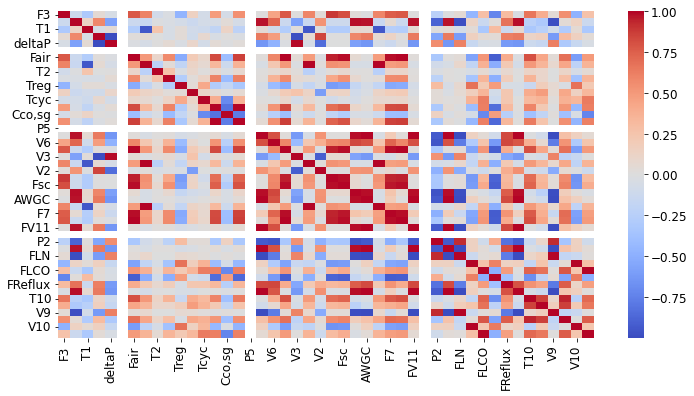

In [8]:
sns.heatmap(df_deltaP_increase.corr(),cmap='coolwarm')

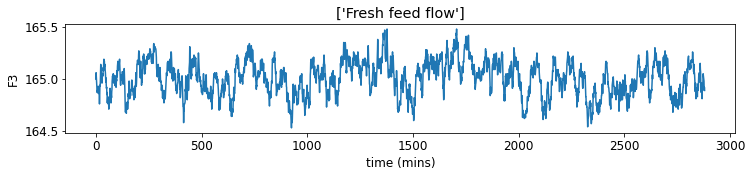

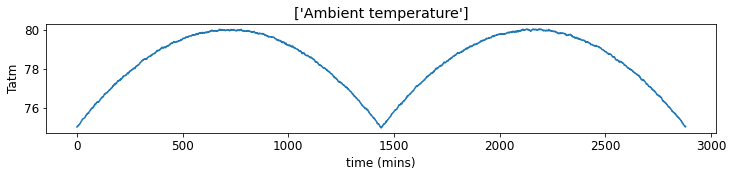

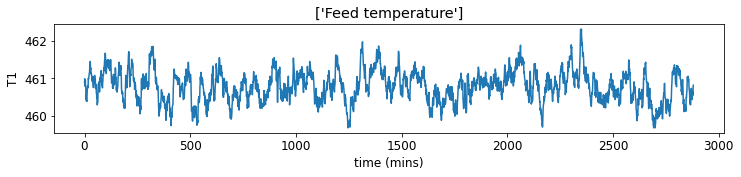

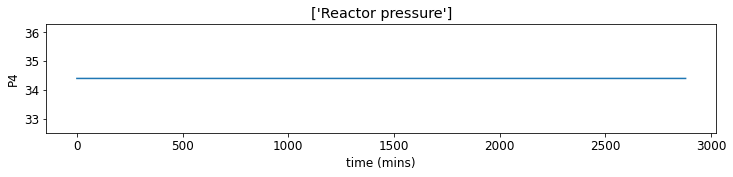

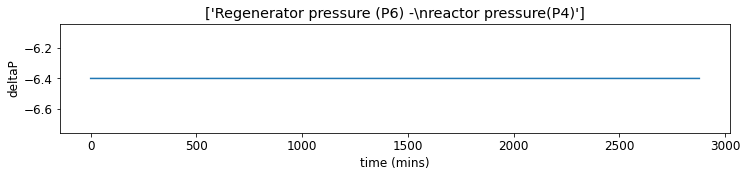

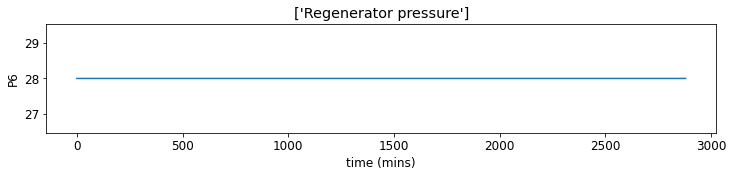

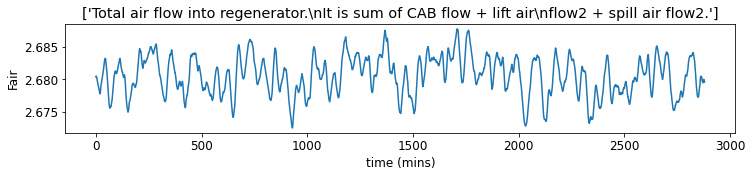

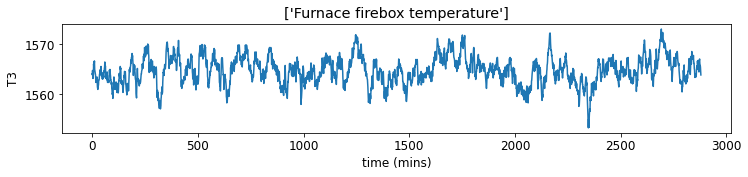

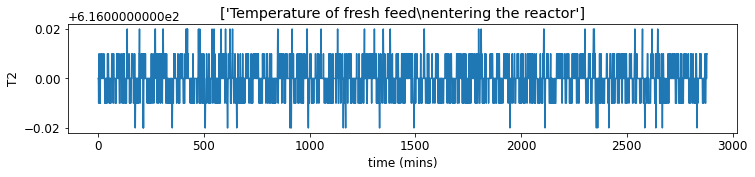

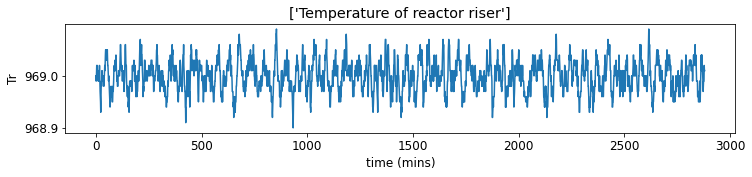

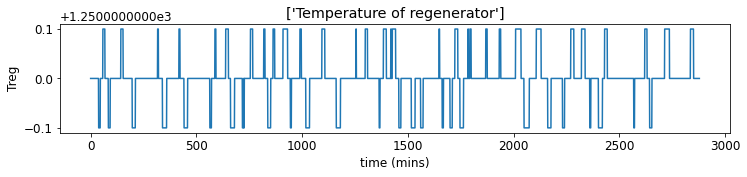

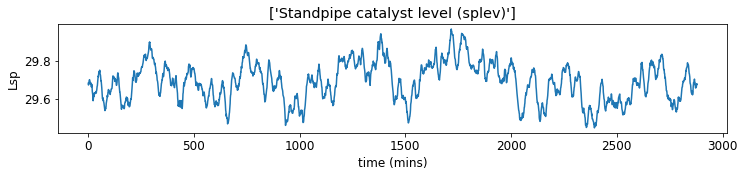

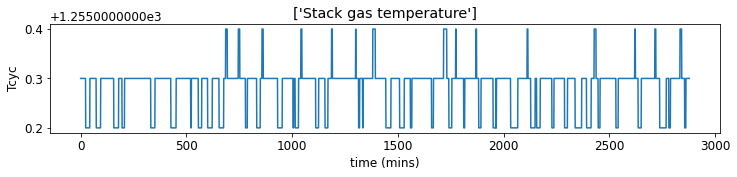

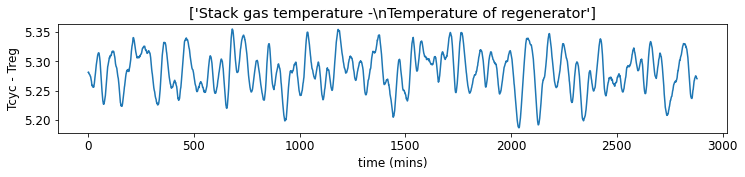

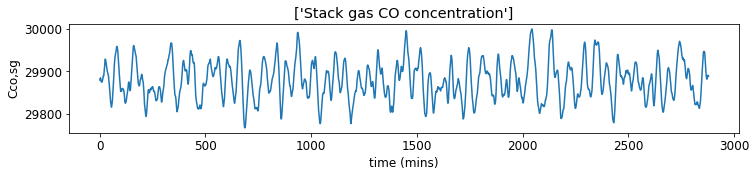

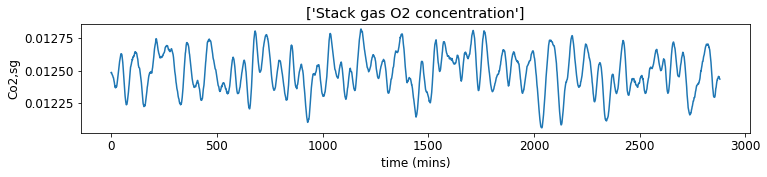

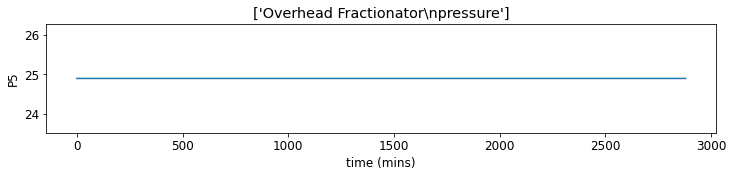

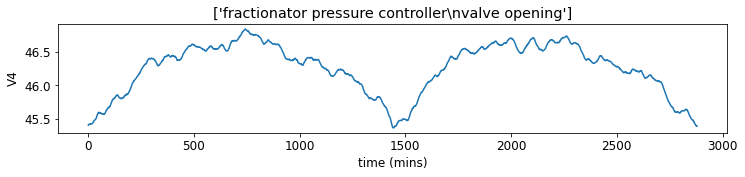

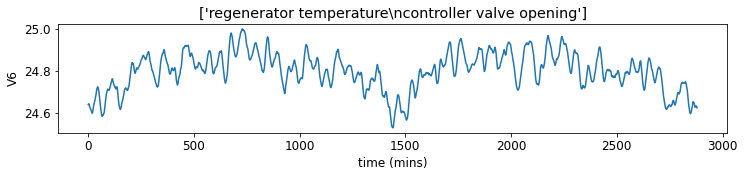

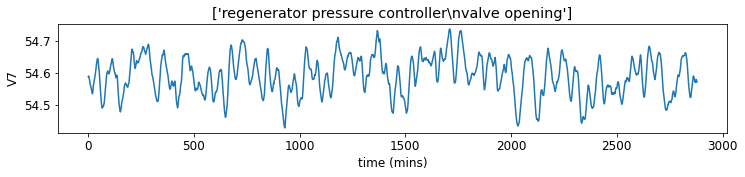

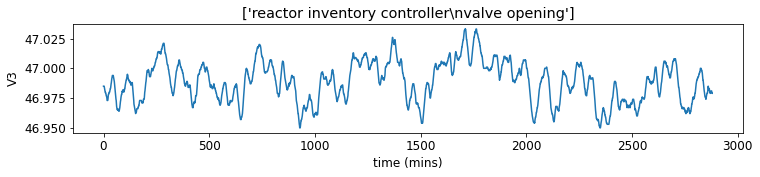

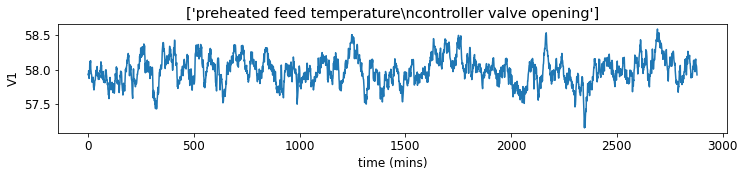

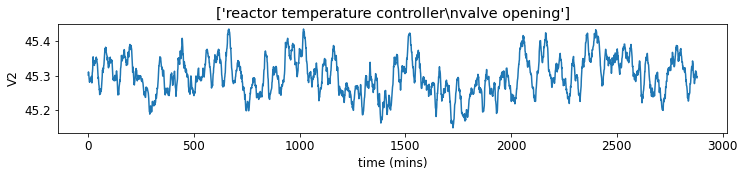

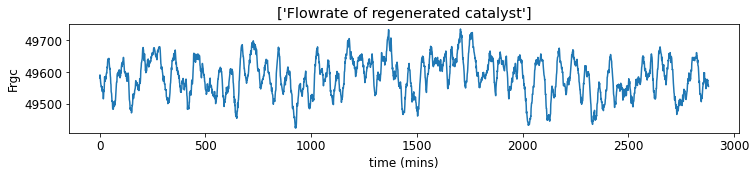

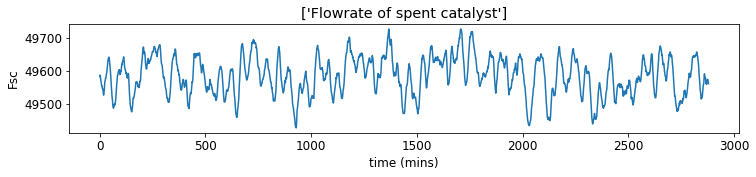

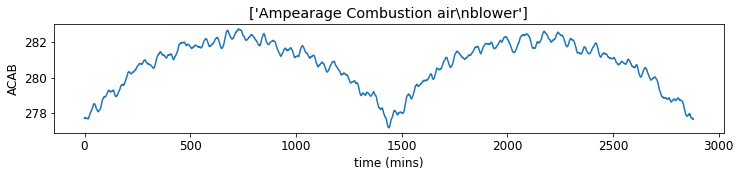

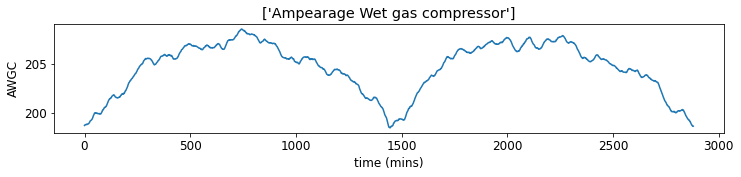

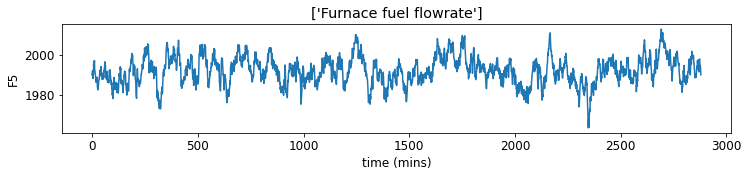

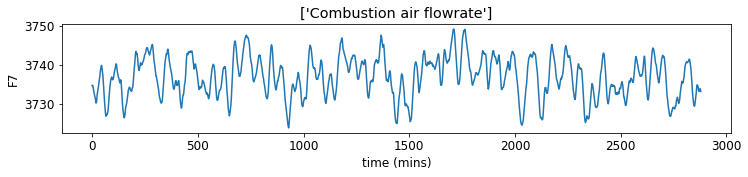

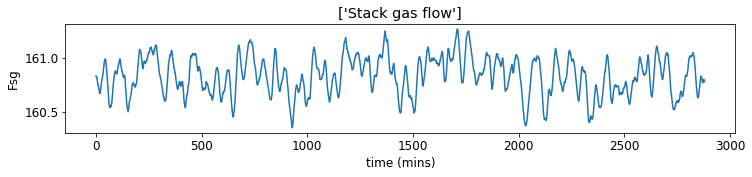

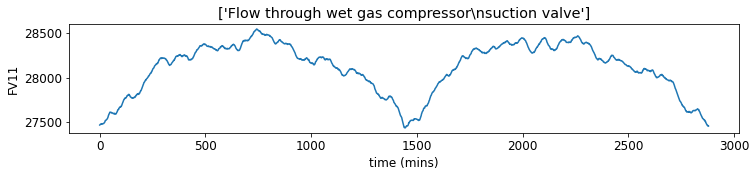

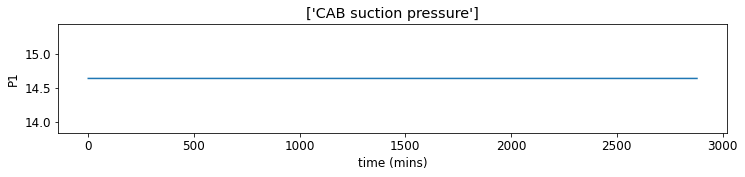

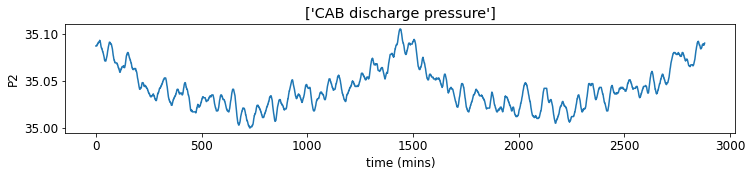

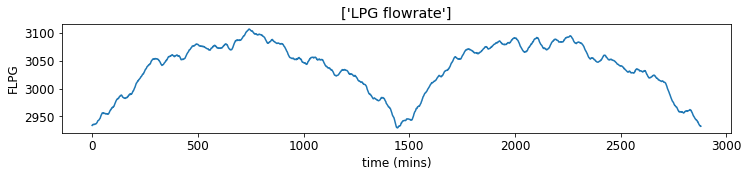

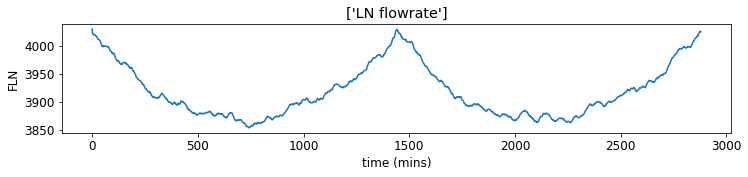

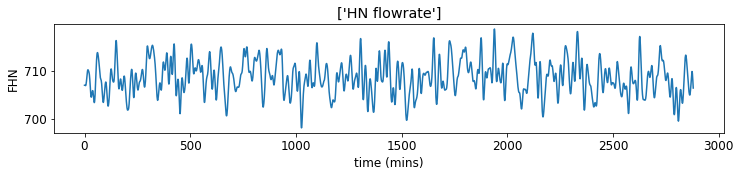

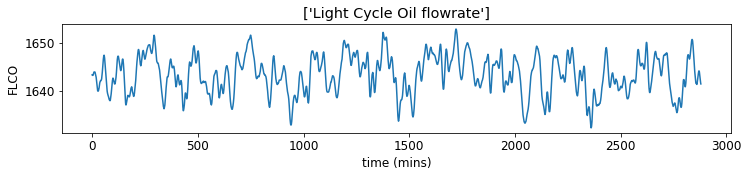

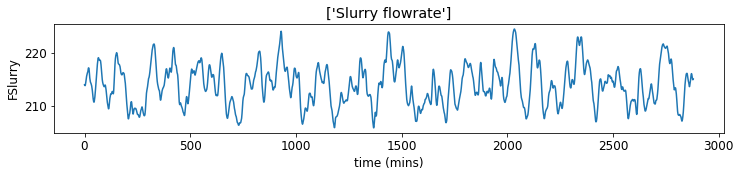

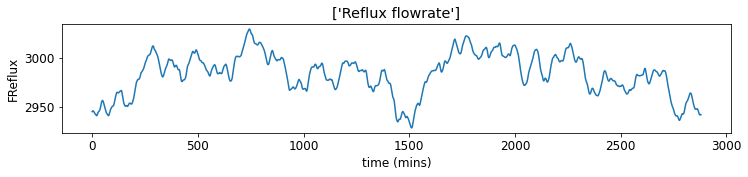

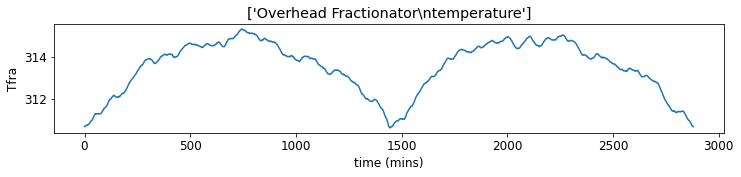

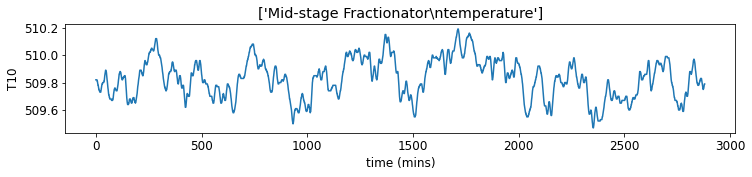

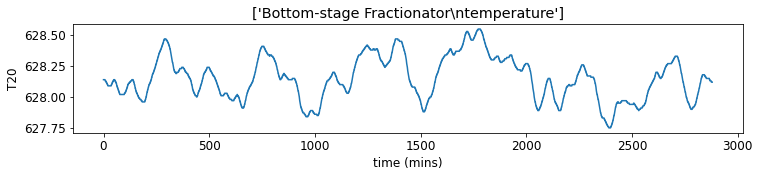

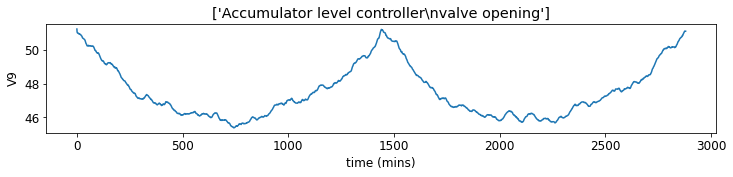

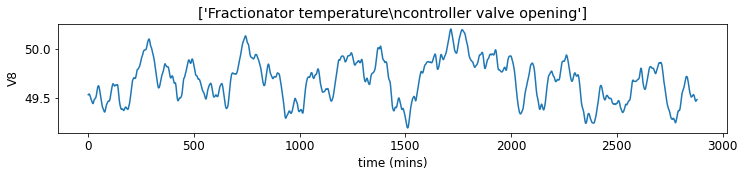

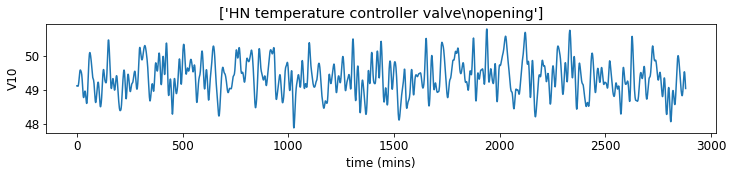

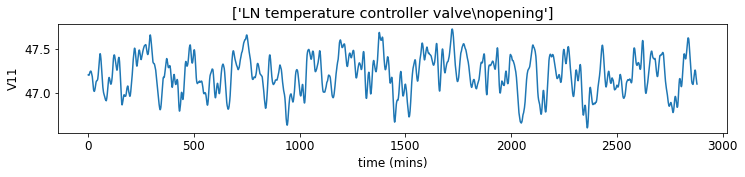

In [9]:
for n,i in enumerate(df_stableFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_stableFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

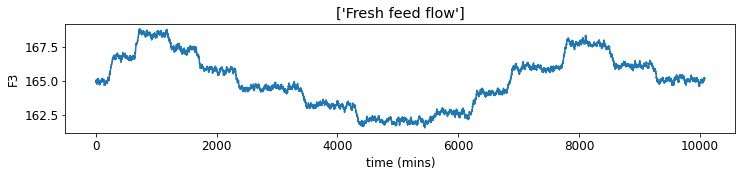

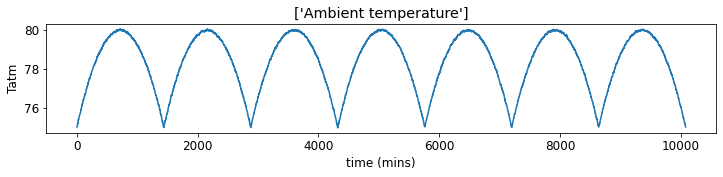

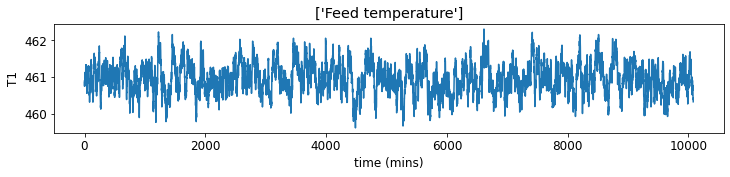

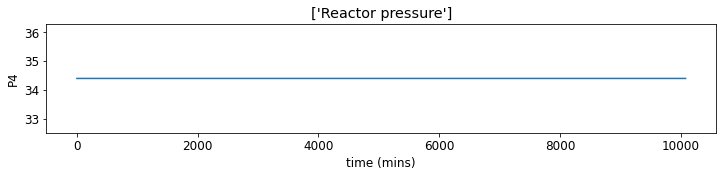

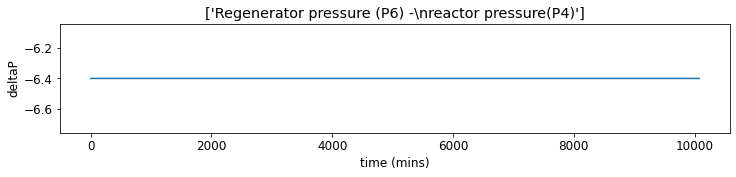

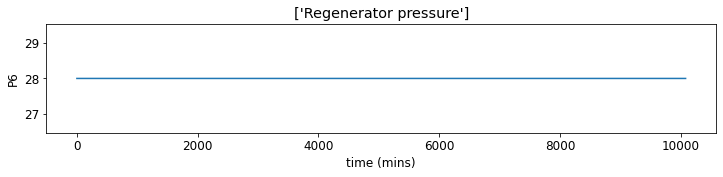

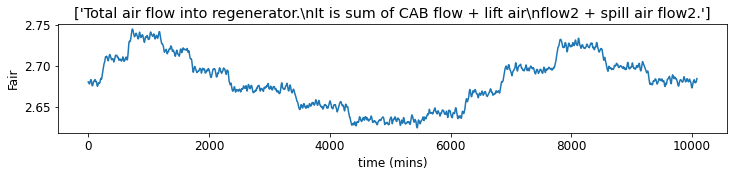

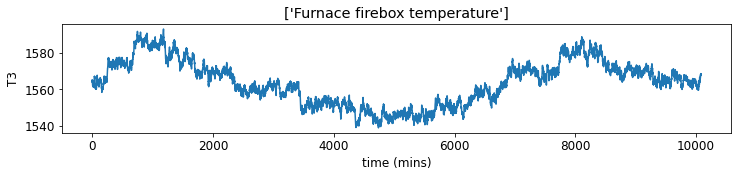

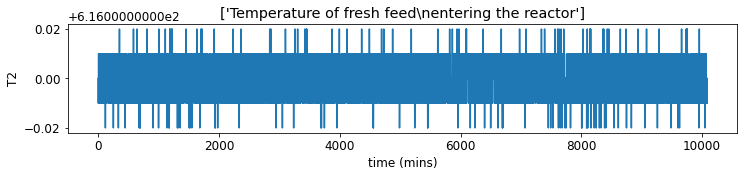

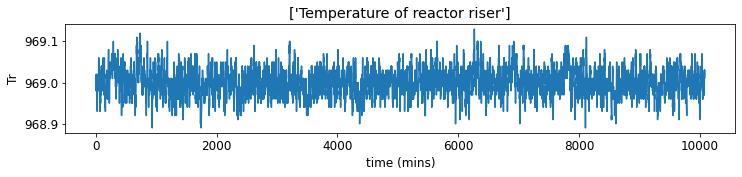

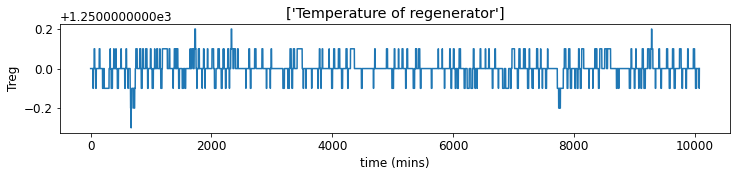

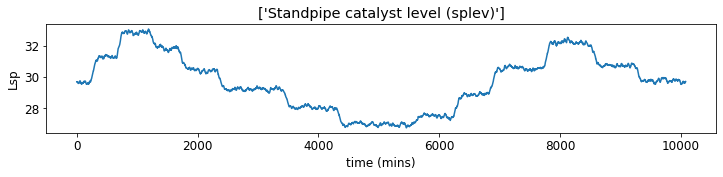

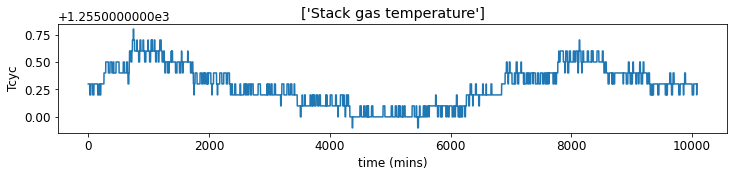

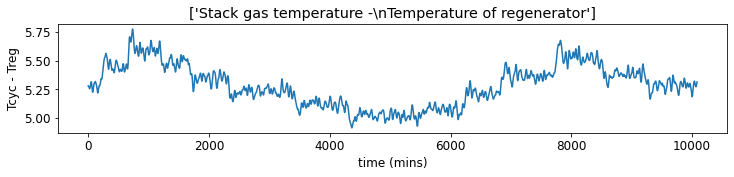

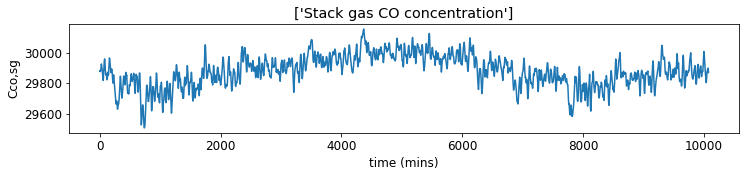

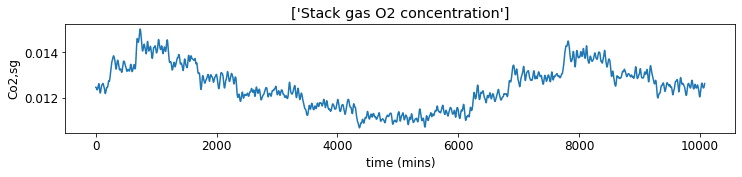

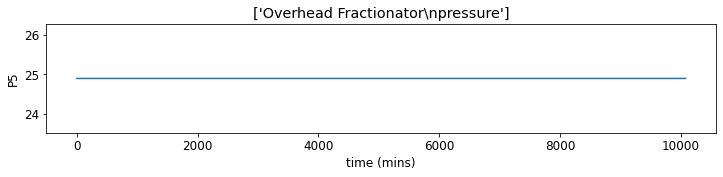

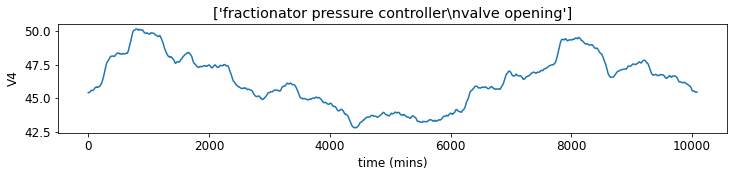

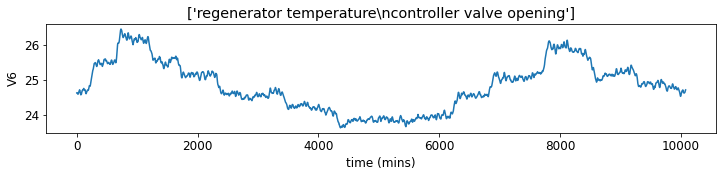

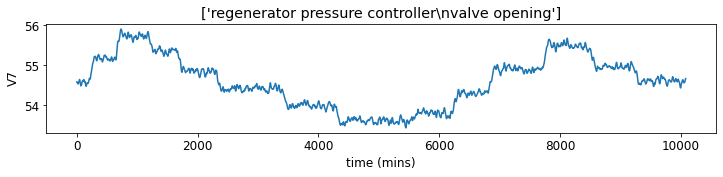

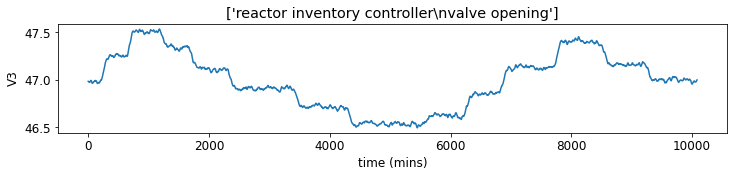

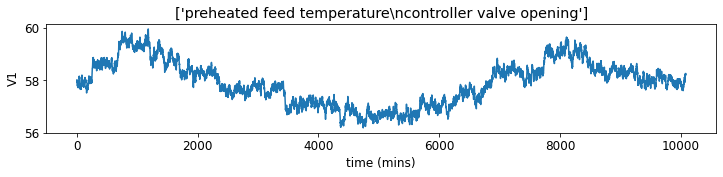

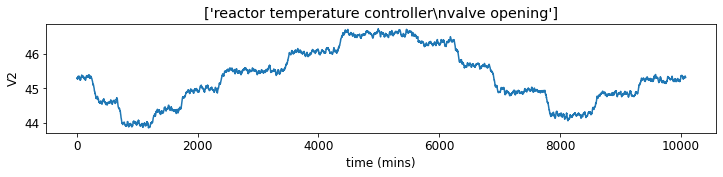

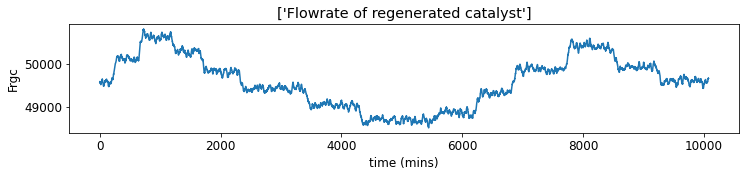

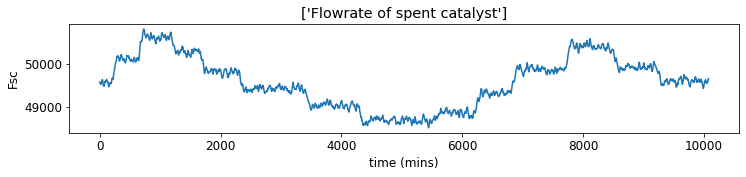

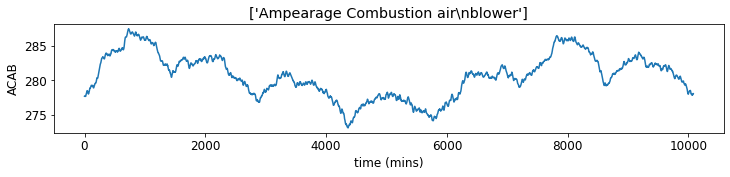

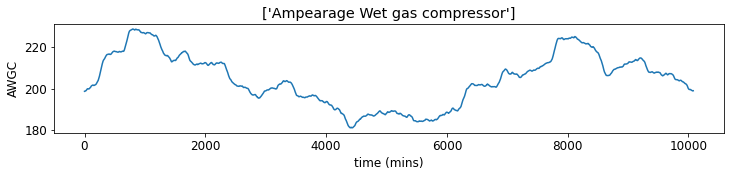

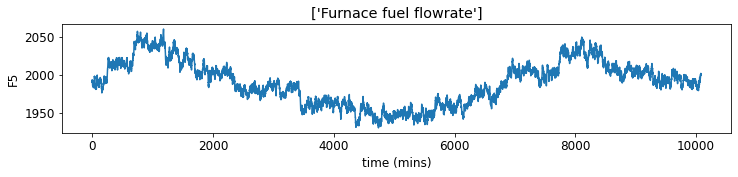

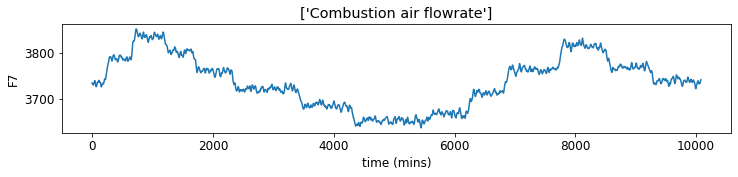

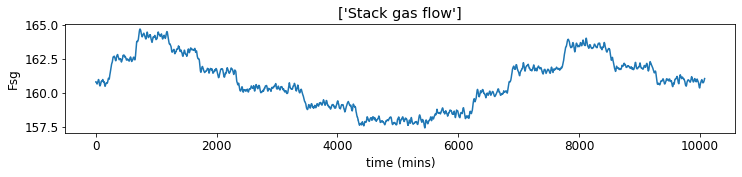

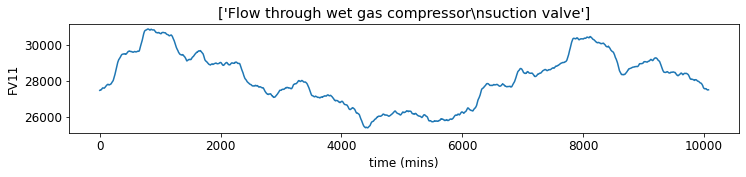

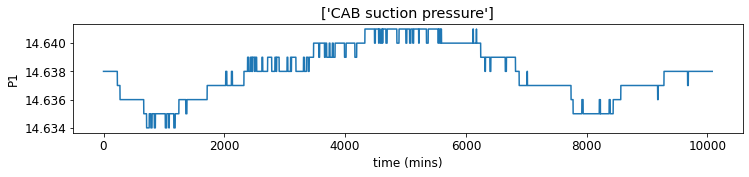

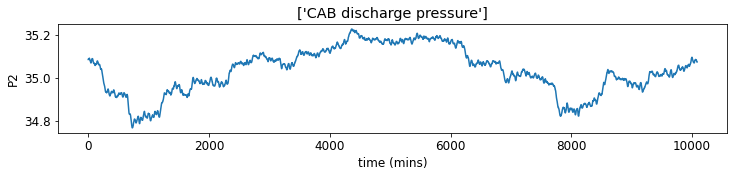

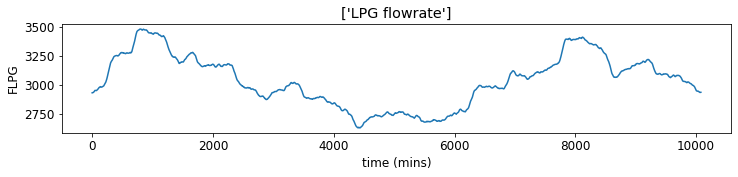

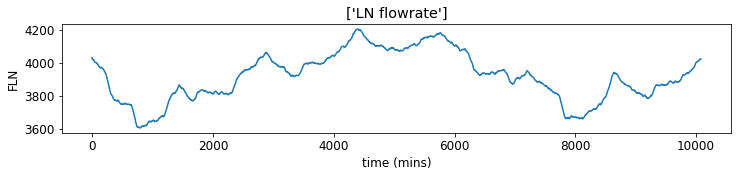

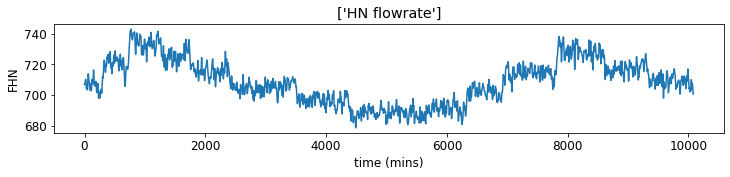

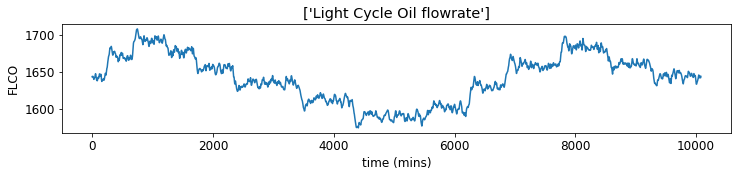

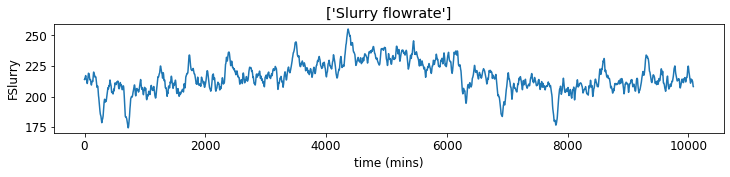

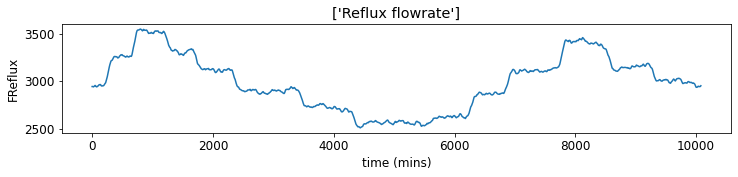

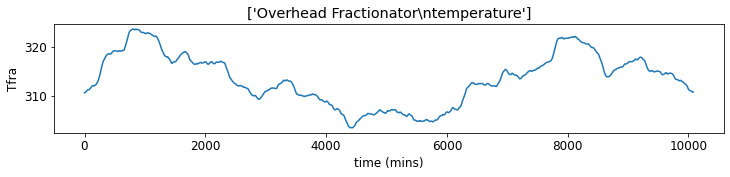

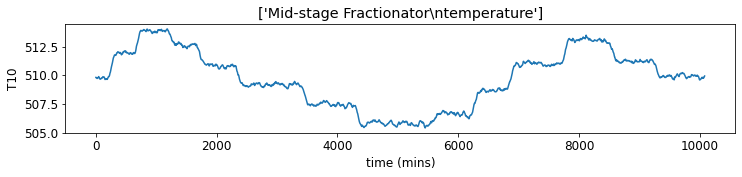

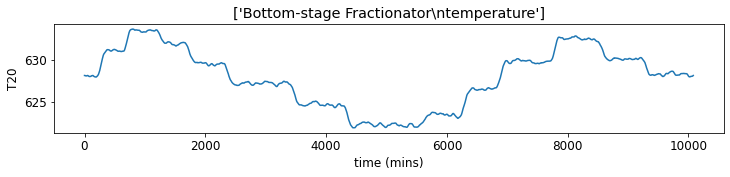

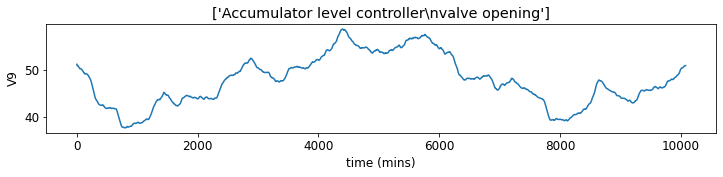

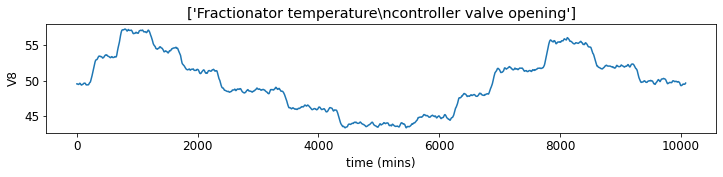

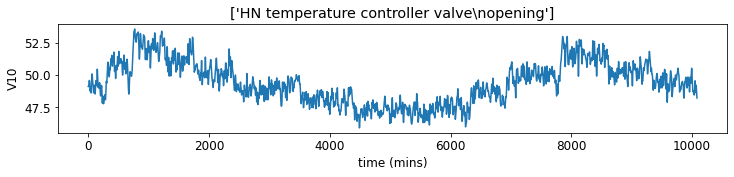

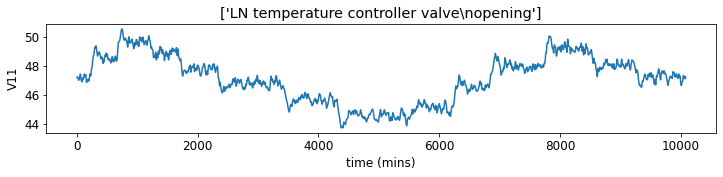

In [10]:
for n,i in enumerate(df_varyingFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_varyingFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

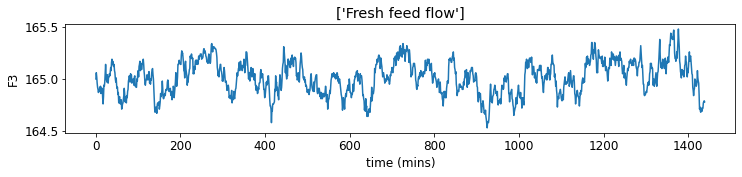

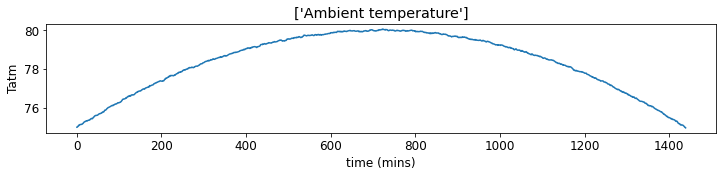

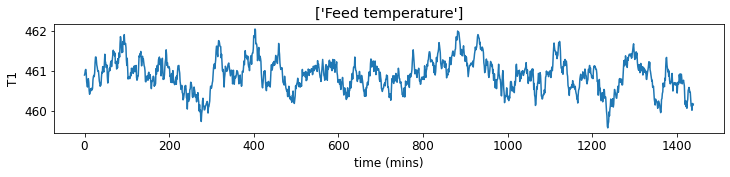

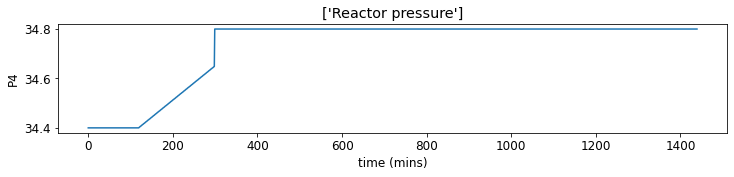

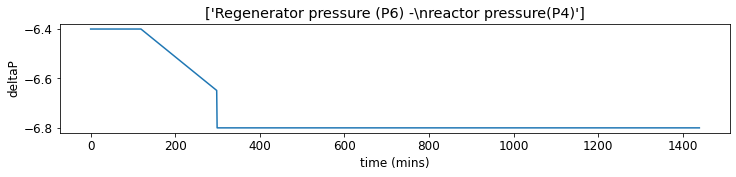

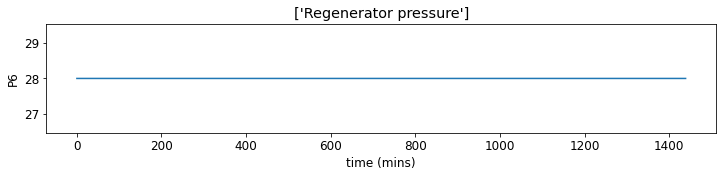

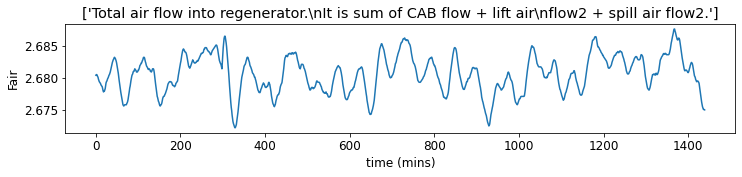

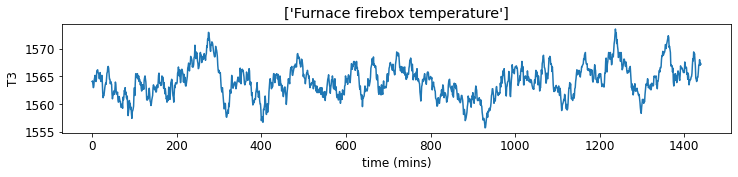

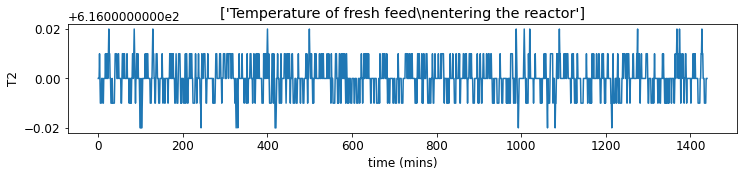

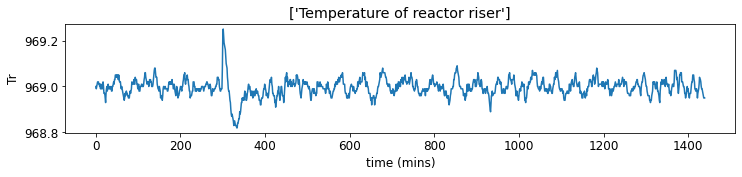

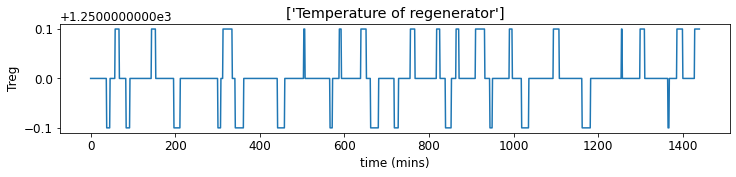

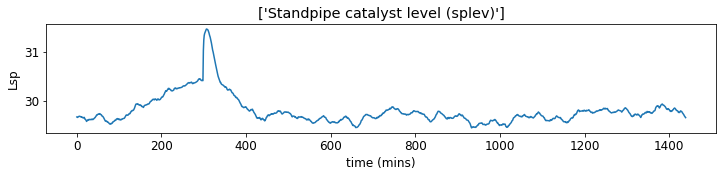

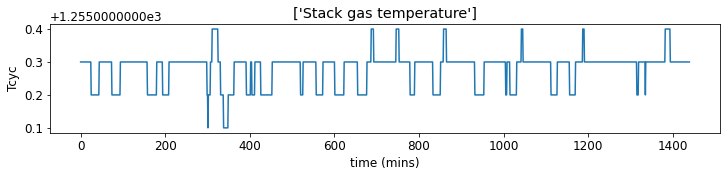

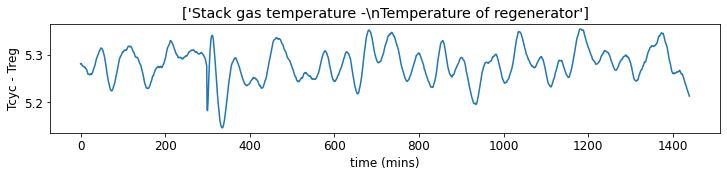

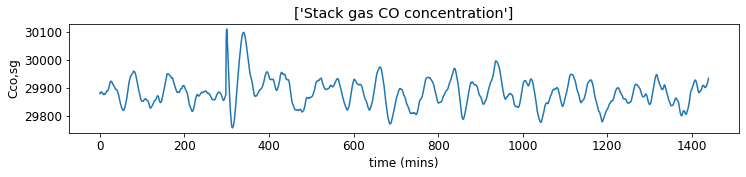

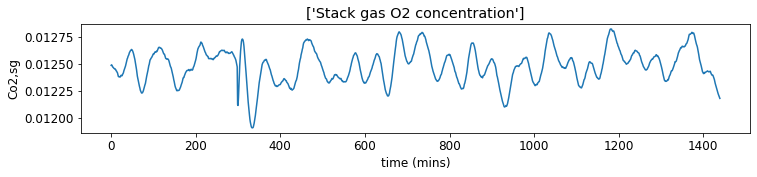

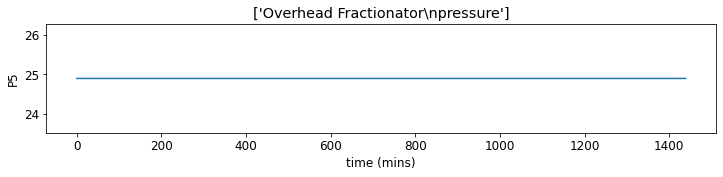

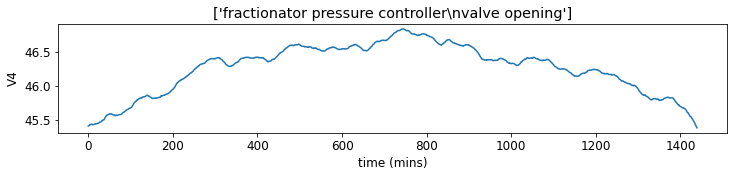

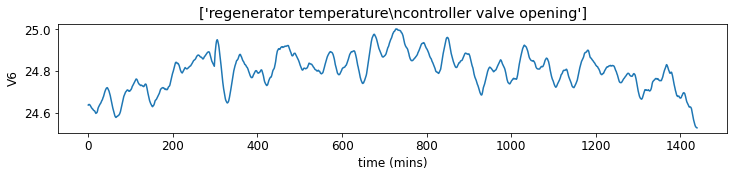

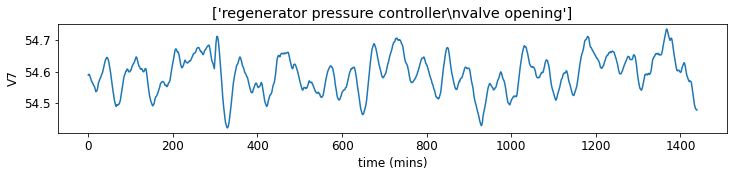

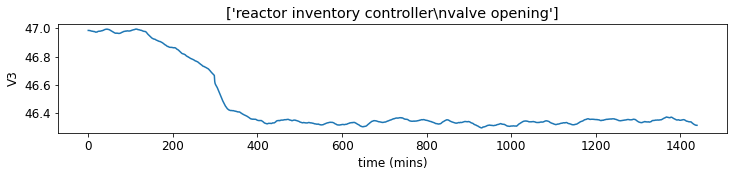

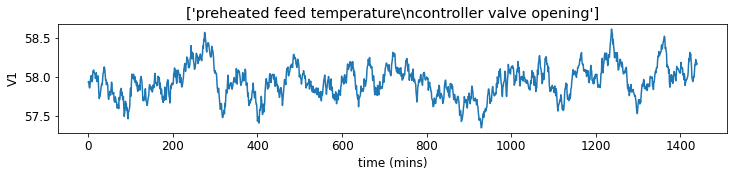

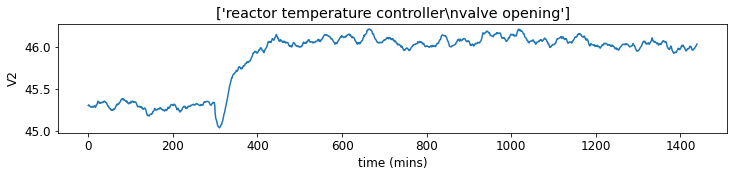

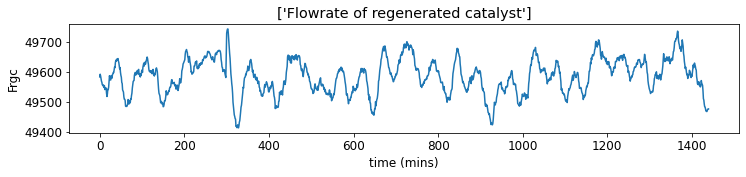

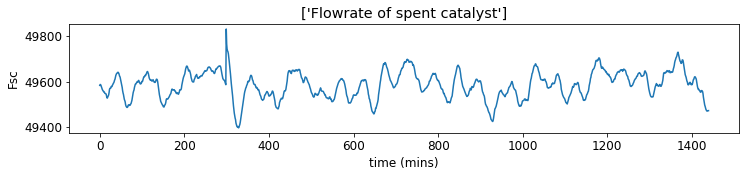

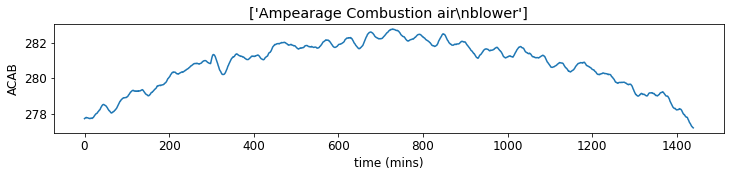

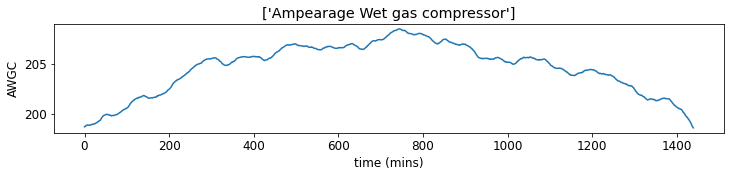

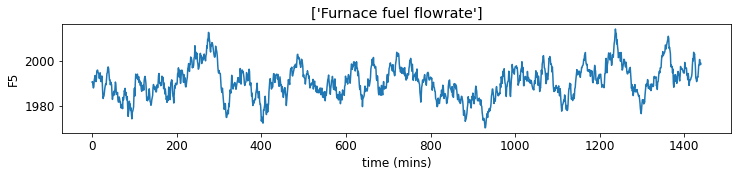

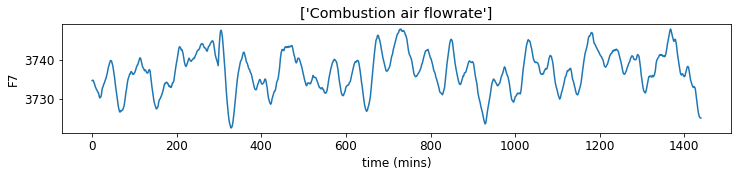

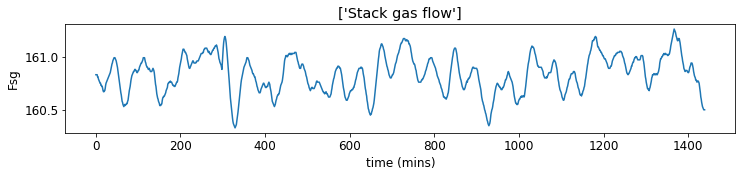

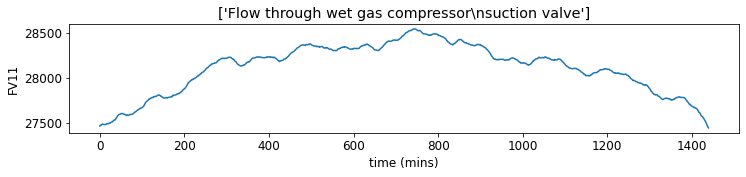

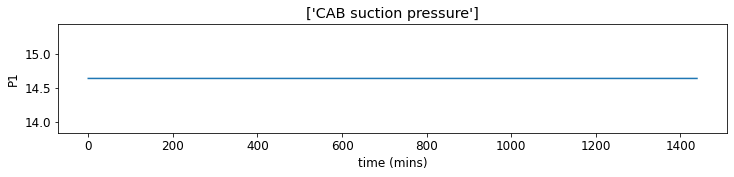

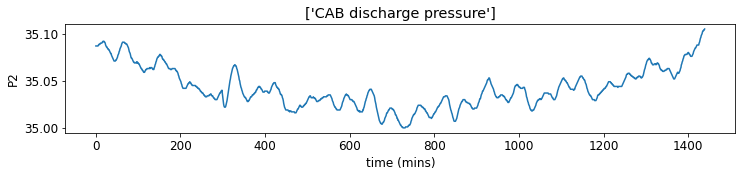

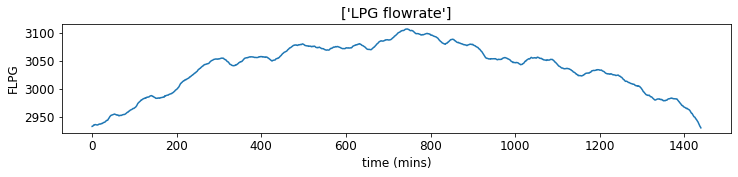

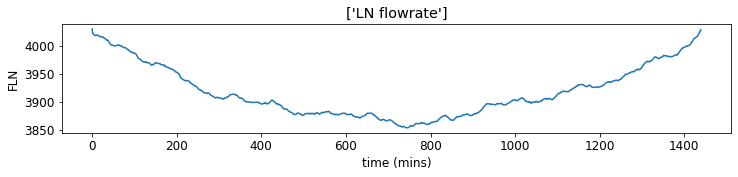

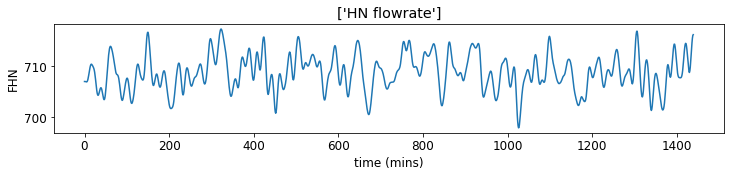

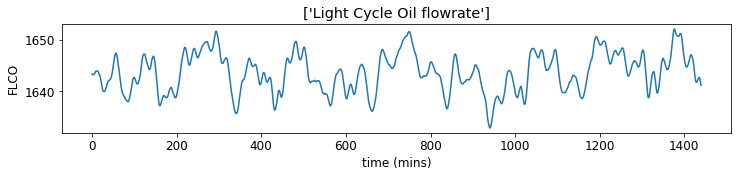

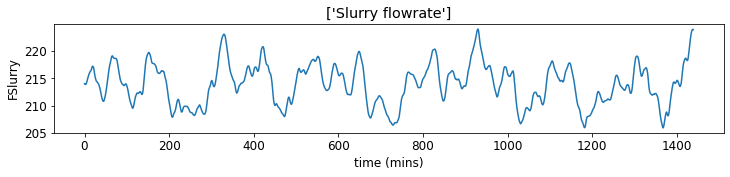

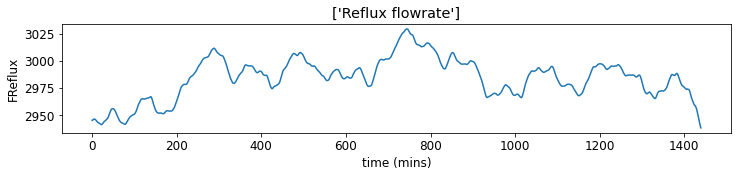

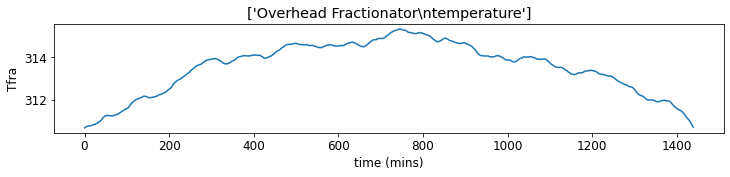

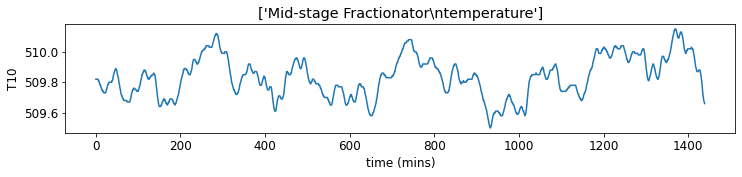

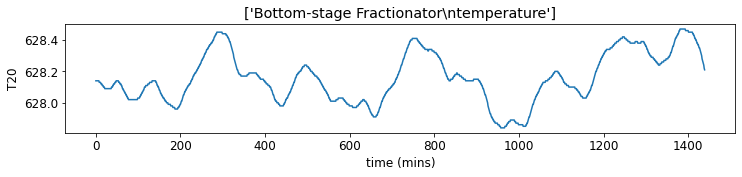

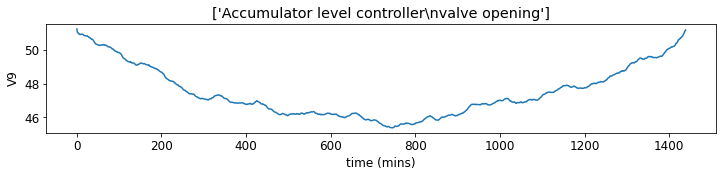

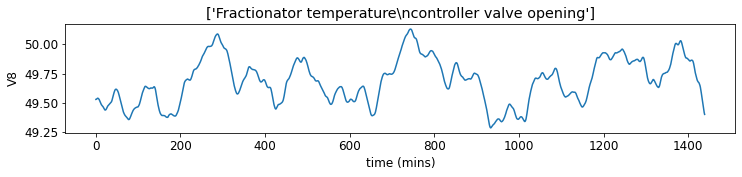

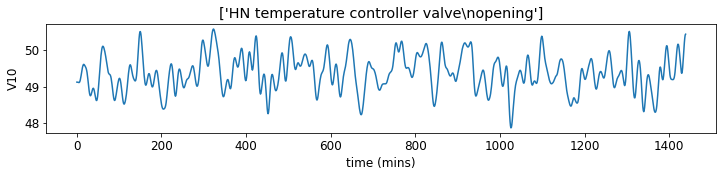

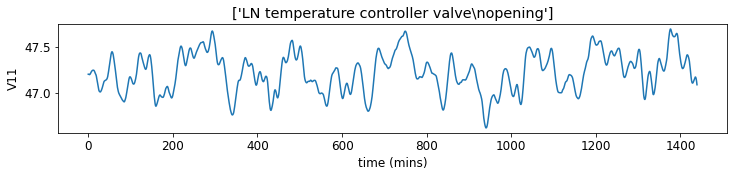

In [11]:
for n,i in enumerate(df_deltaP_increase.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_deltaP_increase[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

**Scaling the data with mean=0 & std = 1 using Standard Scalar.**

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [13]:
X = ss.fit_transform(df_stableFeedFlow)

**Applying PCA**

In [14]:
from sklearn.decomposition import PCA
pca = PCA()

In [15]:
X_pca = pca.fit_transform(X)

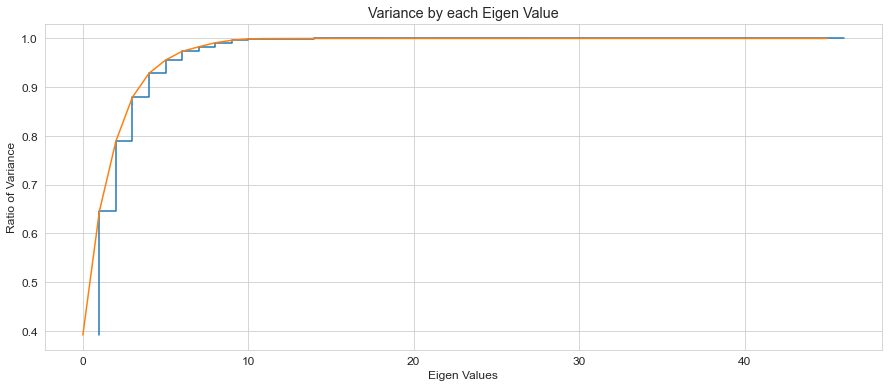

In [16]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,47)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,46)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

It can be clearly seen than 10 dimentions can describe more than 98% data, hence redcing the feature space from 46 to 10.

In [17]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

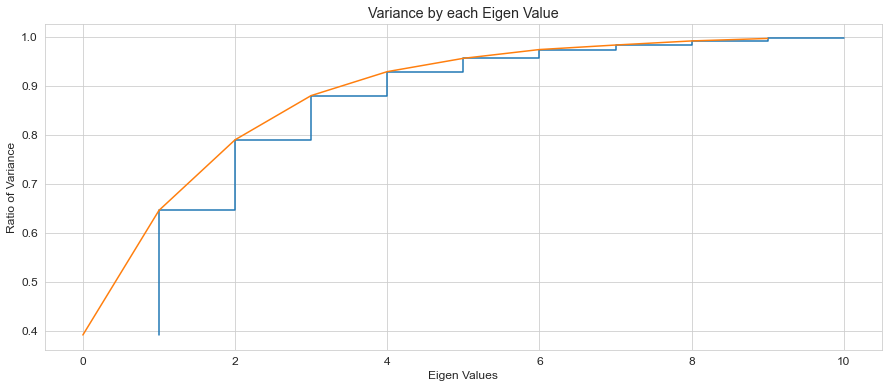

In [18]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,11)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,10)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

**Applying Autoencoders**

In [19]:
X_train = X.reshape(2880,46,1)

Lets create a Sequential model with Bidirectional LSTM & train the model when plant is in steady state.<br>
To avoid overfitting of model by using 20% dropout.

In [20]:
# del model

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True),input_shape=(46,1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 46, 512)           528384    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 46, 512)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 46, 256)           656384    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 46, 256)           0         
                                                                 
 dense (Dense)               (None, 46, 1)             257       
                                                                 
Total params: 1185025 (4.52 MB)
Trainable params: 118502

In [22]:
model.fit(X_train,X_train,epochs=30)

Epoch 1/30
90/90 [==============================] - 506s 1s/step - loss: 0.1596 - mae: 0.2221
Epoch 2/30
90/90 [==============================] - 99s 1s/step - loss: 0.0030 - mae: 0.0389
Epoch 3/30
90/90 [==============================] - 99s 1s/step - loss: 0.0025 - mae: 0.0341
Epoch 4/30
90/90 [==============================] - 97s 1s/step - loss: 0.0022 - mae: 0.0317
Epoch 5/30
90/90 [==============================] - 99s 1s/step - loss: 0.0020 - mae: 0.0302
Epoch 6/30
90/90 [==============================] - 95s 1s/step - loss: 0.0019 - mae: 0.0291
Epoch 7/30
90/90 [==============================] - 95s 1s/step - loss: 0.0018 - mae: 0.0283
Epoch 8/30
90/90 [==============================] - 81s 902ms/step - loss: 0.0018 - mae: 0.0277
Epoch 9/30
90/90 [==============================] - 74s 822ms/step - loss: 0.0017 - mae: 0.0272
Epoch 10/30
90/90 [==============================] - 59s 656ms/step - loss: 0.0017 - mae: 0.0269
Epoch 11/30
90/90 [==============================] - 59s 65

**Calculating the Reconstruction error using MAE.**<br>
Considering 99 percentile of error as an acceptable range, and it signifies the steady state operation.

In [23]:
error_ae = []
for i in range(X.shape[0]):
    y_pred = model.predict(X[i].reshape(1,46,1),verbose=None)[0,:,0]
    error_ae.append(np.abs(X[i]-y_pred).sum())
AE_CL = np.percentile(error_ae,99)

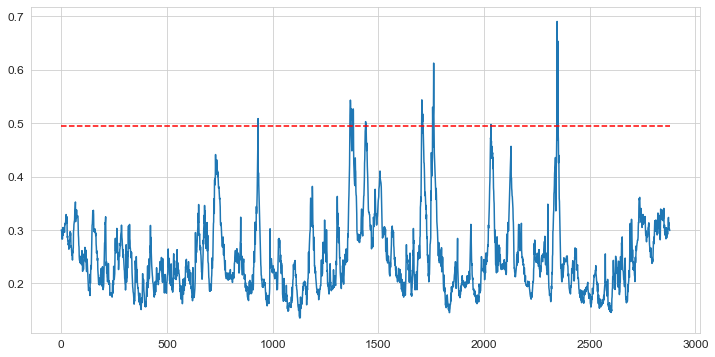

In [24]:
pd.Series(error_ae).plot()
plt.hlines(AE_CL,0,len(error_ae),colors='red',linestyles='--')

**Calculating the Reconstruction error using Q-test, T22-test & Cosine similarity.**<br>
Considering 99 percentile of error as an acceptable range, and it signifies the steady state operation.

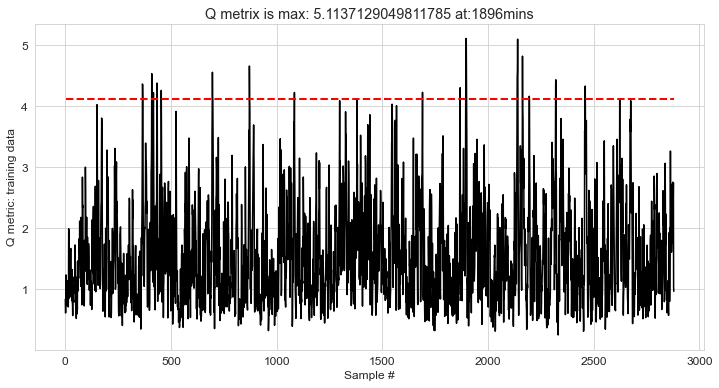

In [25]:
X_reconstructed = np.dot(X_pca,pca.components_)
error_pca = X-X_reconstructed
Q_train = np.sum(np.abs(error_pca),axis=1)
Q_CL = np.percentile(Q_train,99)
# Q_train plot with CL
plt.figure()
plt.plot(Q_train, color='black')
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
plt.show()

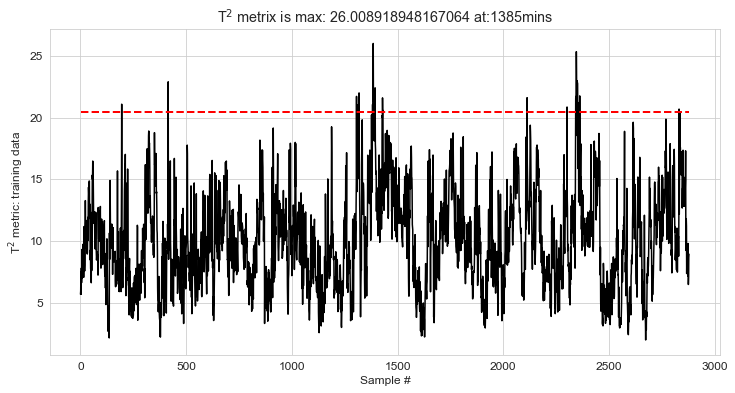

In [26]:
lambda_ = np.diag(pca.explained_variance_)
lambda_inv = np.linalg.inv(lambda_)
T_train = np.zeros(X_pca.shape[0])
for i in range(X_pca.shape[0]):
    T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
T_CL = np.percentile(T_train,99)
# T2_train plot with CL
plt.figure()
plt.plot(T_train, color='black')
plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('T$^2$ metric: training data')
plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
plt.show()

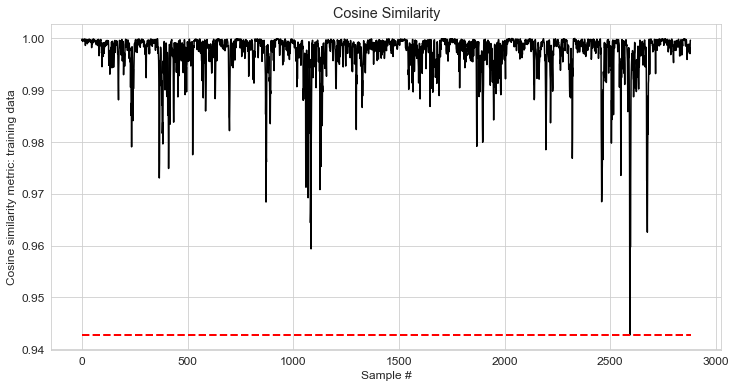

In [27]:
cosine = []
ed = []
for i in range(X.shape[0]):
    v1 = X[i]
    v2 = np.dot(X_pca,pca.components_)[i]
    cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
    ed.append(np.linalg.norm(v1 - v2))
C_CL = np.min(cosine)
E_CL = np.percentile(ed,99)
# pd.Series(ed).plot(color='black')
# plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
# plt.show()
pd.Series(cosine).plot(color='black')
plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Cosine similarity metric: training data')
plt.title(f'Cosine Similarity')
plt.show()

In [28]:
Q_CL,T_CL,C_CL,E_CL,AE_CL

(4.123113215519081,
 20.42435035256881,
 0.9427550112367159,
 0.9281694746755792,
 0.4939223254797154)

Let's create a function for test data preprocessing and testing the data with our model.

In [29]:
def Q_test(X,X_pca,pca_components_,Q_CL):
    X_reconstructed = np.dot(X_pca,pca_components_)
    error_pca = X-X_reconstructed
    Q_train = np.sum(np.abs(error_pca),axis=1)
    # Q_train plot with CL
    plt.figure()
    plt.plot(Q_train, color='black')
    plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Q metric: training data')
    plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
    plt.show()
    return error_pca

In [30]:
def T_test(X_pca,explained_variance_,TCL):
    lambda_ = np.diag(pca.explained_variance_)
    lambda_inv = np.linalg.inv(lambda_)
    T_train = np.zeros(X_pca.shape[0])
    for i in range(X_pca.shape[0]):
        T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
    # T2_train plot with CL
    plt.figure()
    plt.plot(T_train, color='black')
    plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('T$^2$ metric: training data')
    plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
    plt.show()

In [31]:
def cosine(X,X_transformed,pca_components_,C_CL,E_CL):
    cosine = []
    ed = []
    for i in range(X.shape[0]):
        v1 = X[i]
        v2 = np.dot(X_transformed,pca_components_)[i]
        cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
        ed.append(np.linalg.norm(v1 - v2))
#     pd.Series(ed).plot(color='black')
#     plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
#     plt.xlabel('Sample #')
#     plt.ylabel('Eucledian Distance metric: training data')
#     plt.show()
    pd.Series(cosine).plot(color='black')
    plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Cosine similarity metric: training data')
    plt.title(f'Cosine Similarity')
    plt.show()

In [32]:
def autoencoder(df_test,CL):
    X_test = ss.transform(df_test)
    error_ae = []
    error_sum = []
    for i in range(X_test.shape[0]):
        y_pred = model.predict(X_test[i].reshape(1,46,1),verbose=None)[0,:,0]
        error_ae.append(np.abs(X_test[i]-y_pred))
        error_sum.append(np.abs(X_test[i]-y_pred).sum())
    error_ae=np.array(error_ae)
    pd.Series(error_sum).plot(color = 'black')
    plt.hlines(CL,0,len(error_ae),colors='red',linestyles='--')
    plt.xlabel('Sample #')
    plt.ylabel('Reconstruction error by Autoencoder')
    return error_ae

## **Testing the model on Varying feed flow rate.**

In [33]:
X = ss.transform(df_varyingFeedFlow)
X_test = pca.transform(X)

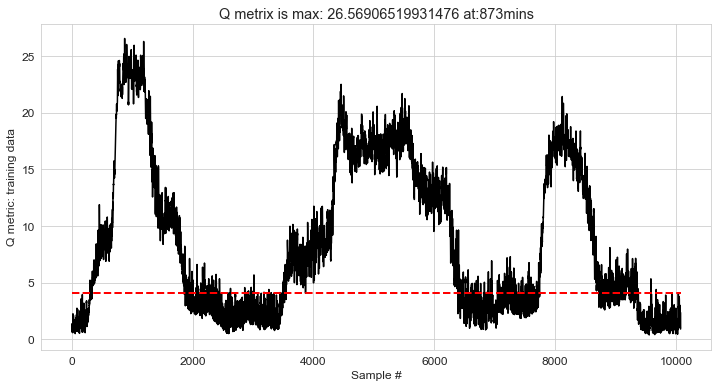

In [34]:
error_pca = Q_test(X,X_test,pca.components_,Q_CL)

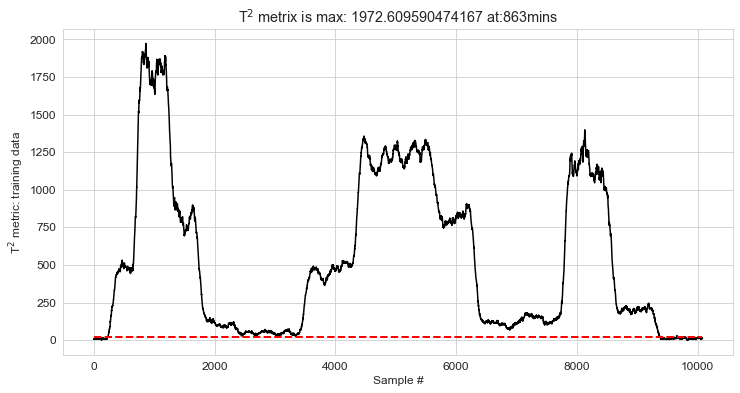

In [35]:
T_test(X_test,pca.explained_variance_,T_CL)

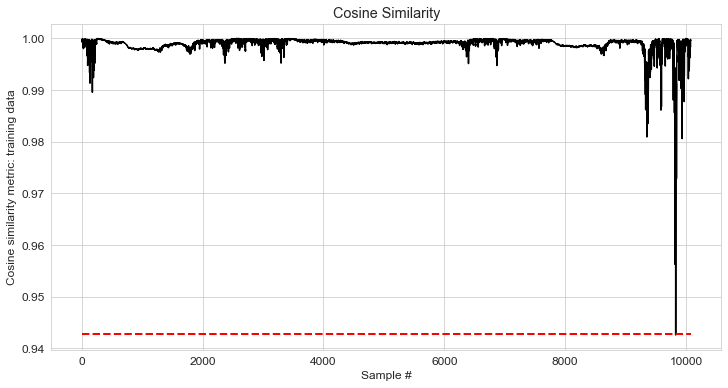

In [36]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

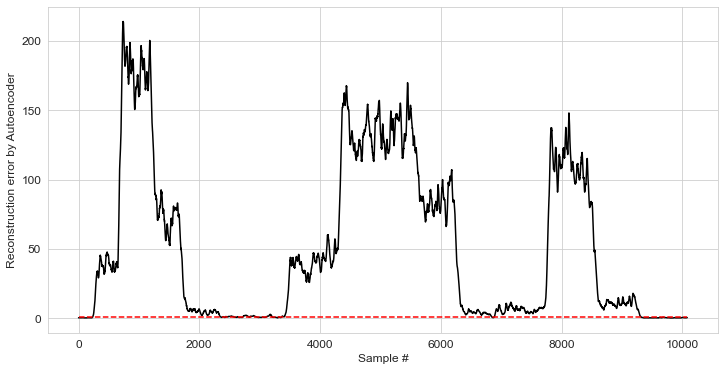

In [37]:
error_ae = autoencoder(df_varyingFeedFlow,AE_CL)

## **Testing the model on abnormal dataset.**

In [38]:
X = ss.transform(df_deltaP_increase)
X_test = pca.transform(X)

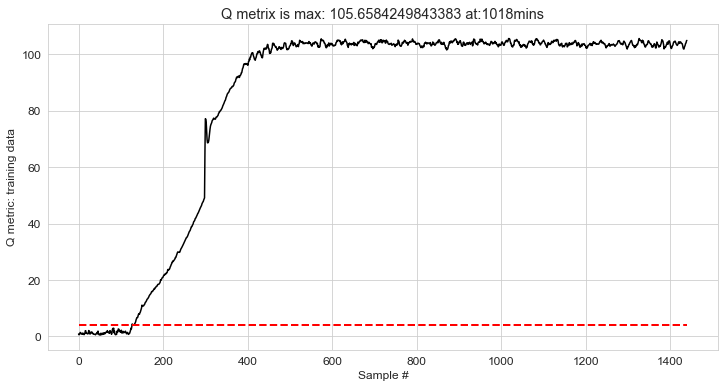

In [39]:
error_pca = Q_test(X,X_test,pca.components_,Q_CL)

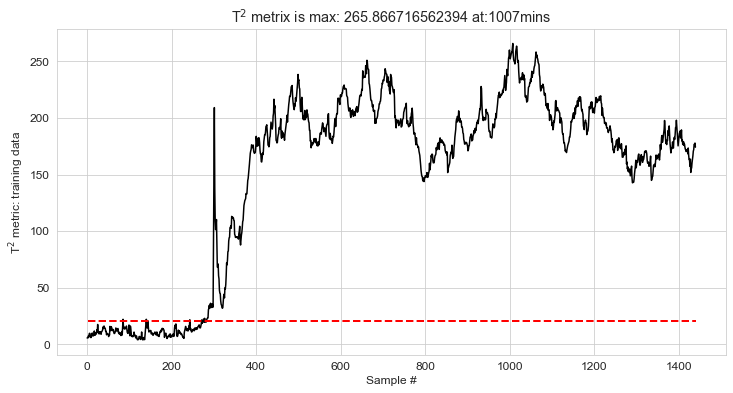

In [40]:
T_test(X_test,pca.explained_variance_,T_CL)

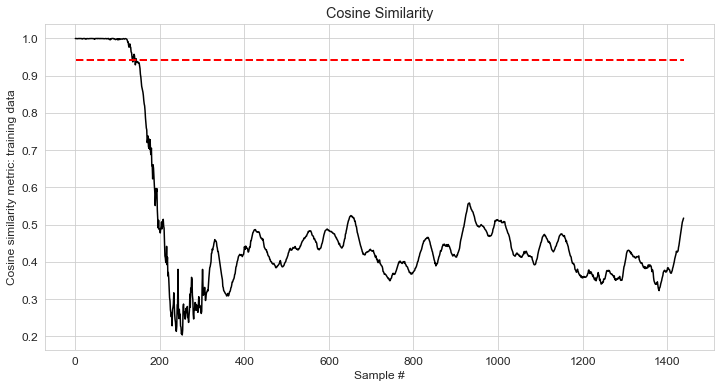

In [41]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

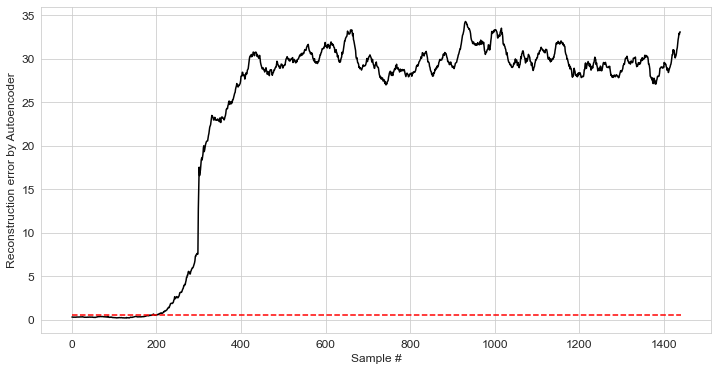

In [42]:
error_ae = autoencoder(df_deltaP_increase,AE_CL)

**Inference**<br>
During steady state operation the errors are within limit but, suddenly the error starts increasing after 200mins.<br>
So, let’s check which parameters are deviating maximum form steady state.<br>
Considering top 10 variables responsible for plant deviation.

## **Visualization**

Time- 299 mins


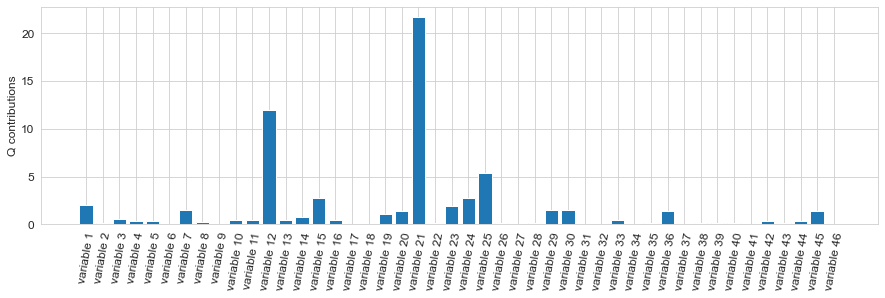

In [43]:
#%% Q contribution
sample = sample = ((pd.Series(error_pca.sum(axis=1))-pd.Series(error_pca.sum(axis=1)).shift()).abs()).argmax()
print('Time-',sample,'mins')
error_test_sample = error_pca[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

plt.figure(figsize=[15,4])
plt.bar(['variable ' + str((i+1)) for i in range(len(Q_contri))], Q_contri)
plt.xticks(rotation = 80)
plt.ylabel('Q contributions')
plt.show()

Time- 299 mins


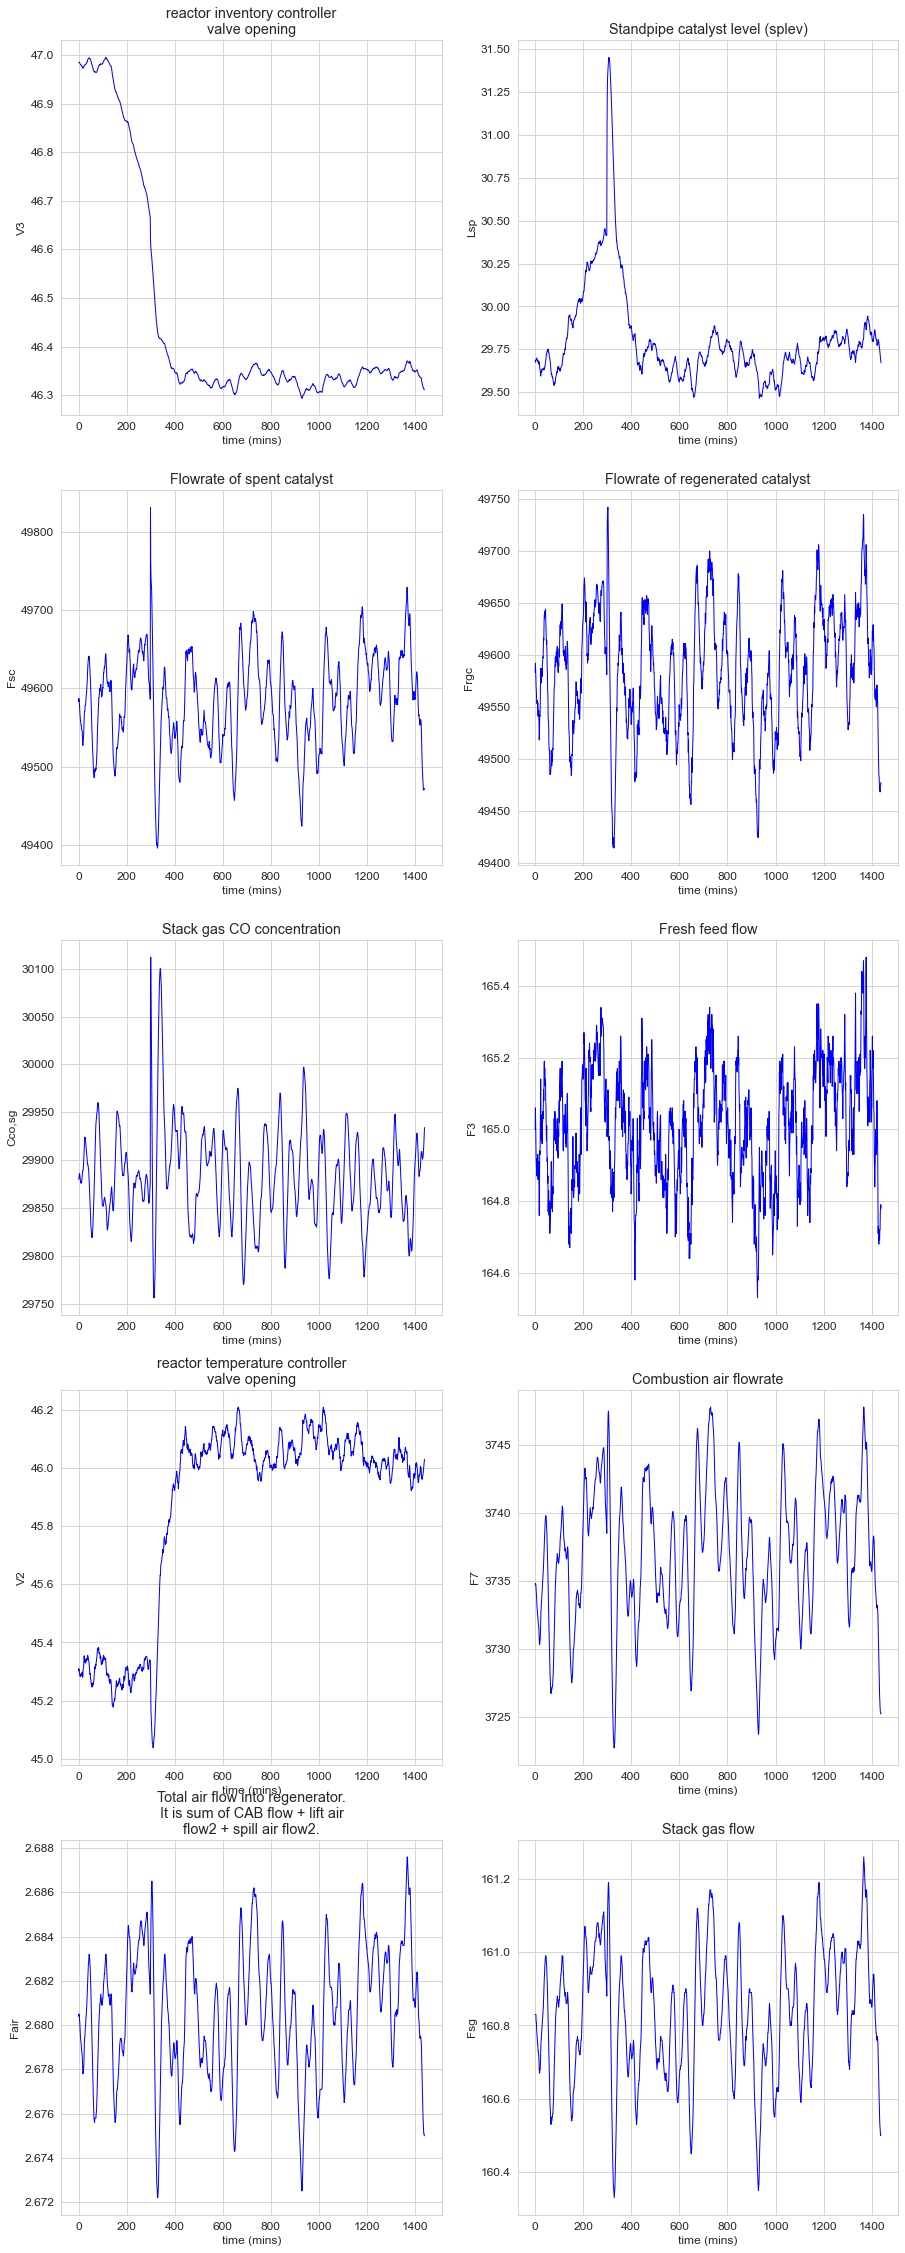

In [44]:
plt.figure(figsize=(15,40))
print('Time-',sample,'mins')
for i,n in enumerate(np.argsort(Q_contri)[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_deltaP_increase.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show

Time- 299 mins


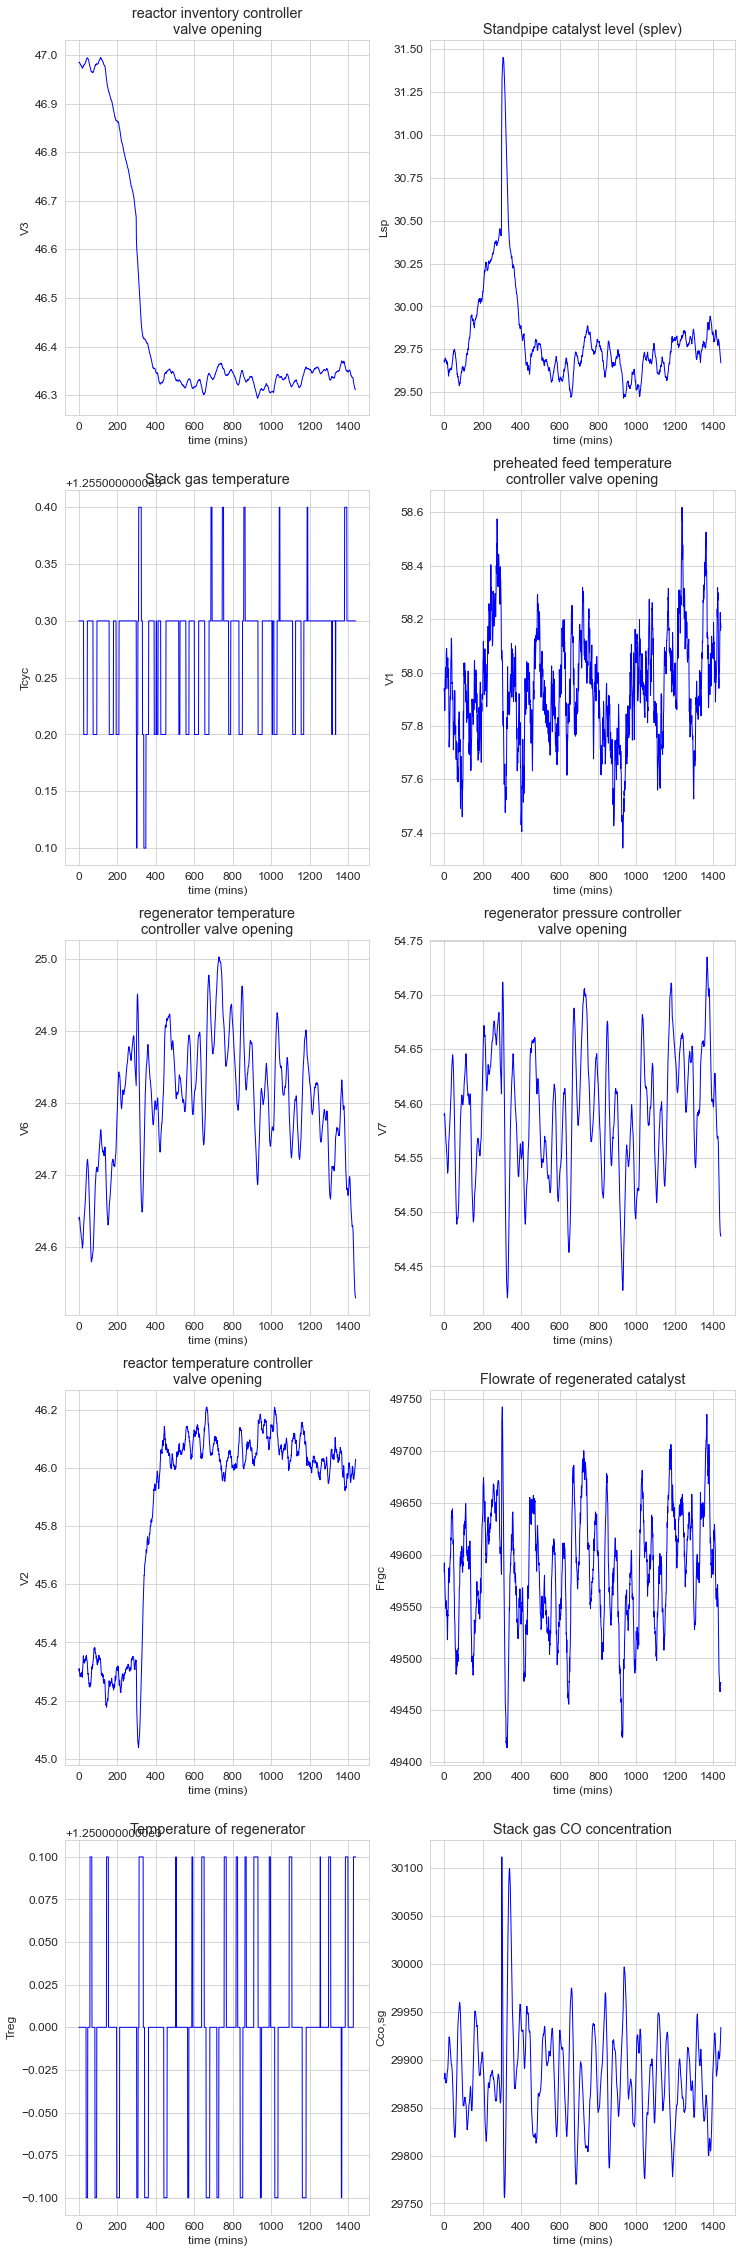

In [45]:
plt.figure(figsize=(15,40))
sample = ((pd.Series(error_ae.sum(axis=1))-pd.Series(error_ae.sum(axis=1)).shift()).abs()).argmax()
print('Time-',sample,'mins')
for i,n in enumerate(np.argsort(error_ae[sample])[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_deltaP_increase.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show

# **Conclusion**
RCSV opening has suddenly decreased, Catalyst level in reactor has suddenly increased & then reduced which indicates that CV is closing to reduce the catalyst flow form Reactor to Regenerator. This is due to increase in Reactor pressure and temperature which increases the flow of spent catalyst through SCSV. This has increased the Pressure difference between Reactor and regenerator.